# Visualize lambdas

In this notebook we will visualize lambdas with normal 2D plots and circular plots

To run this notebook you must have the following files:
- "../analyzed_output/stages_comparison_df_ecadGFPnbG4.csv"

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge, Rectangle, Arc
from matplotlib.collections import PatchCollection
import matplotlib
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import ListedColormap

codeRepo = "/Users/krishna/PhD/WDeversion_theory/"
dataout = codeRepo + "/Experiments/analyzed_output/plots/" 
os.makedirs(dataout, exist_ok=True)
plt.style.use(codeRepo + 'src/WDeversion_theory_methods/seaborn-custom-whitegrid.mplstyle')

In [2]:
genotype = "ecadGFPnbG4"
#genotype = 'ecadGFPnbG4myoVI'
df_comparison = pd.read_csv(codeRepo + 'Experiments/analyzed_output/stages_comparison_df_' + genotype + '.csv')
df_comparison['roi'] = df_comparison['region']

In [3]:
C96hAEL = '#F9F06C'
C120hAEL = '#EBA434'
Cupcrawling = '#414042'
CwhitePupa = '#003399'
C2hAPF = '#0080FF'
C4hAPF = '#33FFFF'
C6hAPF = '#71C382'
CecadGFPnbG4 = '#404040'
CecadGFPnbG4myoVI = '#0099CC'


colors = {'ecadGFPnbG4': CecadGFPnbG4,
 'ecadGFPnbG4myoVI': CecadGFPnbG4myoVI,
          '96hAEL': C96hAEL,
          '120hAEL':C120hAEL,
 'wL3': Cupcrawling,
 '0hAPF': CwhitePupa,
 '2hAPF': C2hAPF,
 '4hAPF': C4hAPF,
 '6hAPF': C6hAPF}

devstage_combinations = pd.DataFrame({'devstage_init':['wL3','wL3','wL3',],
                                      #'devstage_init':['wL3','0hAPF','2hAPF',],
                                     'devstage_final':['0hAPF','2hAPF','4hAPF',],}
                                    )
rois = ["DV", "outDV"]
regions = rois

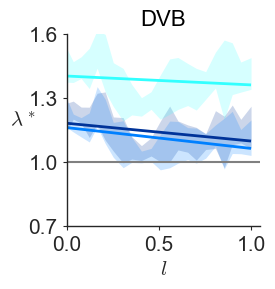

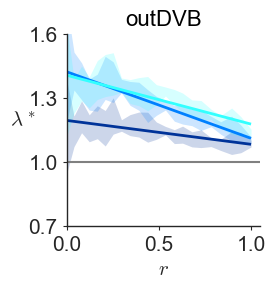

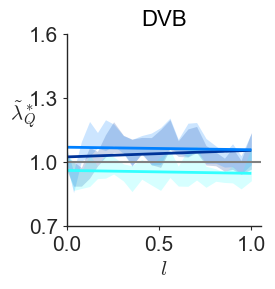

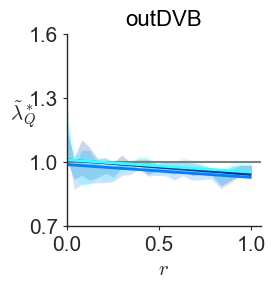

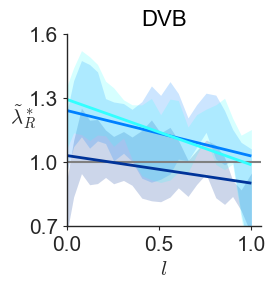

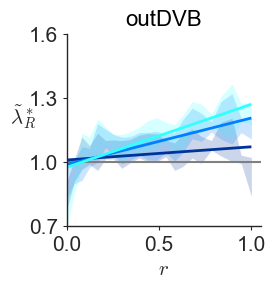

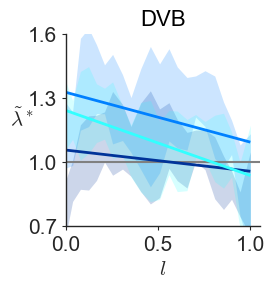

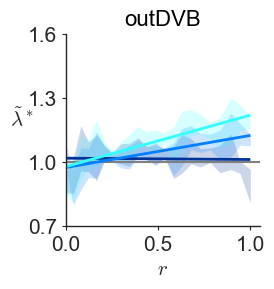

In [4]:
x_col = 'ref_pathlength_scaled'
props = ['lambda_isotropic', 'lambda_Q', 'lambda_rearrangement', 'lambda_anisotropic']
ylabels = [r'$\lambda^*$', r'$\tilde{\lambda}^*_{Q}$', r'$\tilde{\lambda}^*_{R}$', r'$\tilde{\lambda}^*$']
prop = props[0]
ylabel = ylabels[0]
for prop,ylabel in zip(props,ylabels):
    for i in range(len(rois)):
        fig,ax = plt.subplots(figsize = (2.5, 2.5)
                        )
        roi = rois[i]
        if roi == 'DV': 
            #style = '--' 
            xlabel = r'$l$'
            title = 'DVB'
            
        else:
            #style = '-' 
            xlabel = r'$r$'
            title = 'outDVB'
        style = '-' 
        ax.axhline(1, linestyle = '-', color ='grey')
        for j in range(len(devstage_combinations)):

            devstage_init = devstage_combinations.loc[j,'devstage_init']
            #print(devstage_init)
            devstage_final = devstage_combinations.loc[j,'devstage_final']
            #print(devstage_final)        
            
            ax.set_yticks(np.arange(0.7,2, 0.3))
            ax.set_xticks([0.0,0.5,1.0])
            query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'

            data = df_comparison.query(query_str)
            ax.fill_between(x = data[x_col], y1 = data[prop +'_mean'] - data[prop +'_std'], y2 = data[prop +'_mean'] + data[prop +'_std'],color = colors[devstage_final], alpha = 0.2, linewidth = 0)
            ax.plot(data[x_col], data['fit_' + prop +'_mean'], color = colors[devstage_final], linestyle = style, linewidth = 2)
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.set_xlabel(xlabel, rotation = 'horizontal')
            ax.set_ylabel(ylabel, rotation = 'horizontal')
            ax.set_title(title, loc ='center')
            ax.set_ylim(0.7,1.6)
            ax.set_xlim(0,1.05)       
        plt.savefig(dataout + genotype + prop + roi  + '_' + '_std_lamdavsP_cumulative_wFit_eversion.pdf',dpi = 600,bbox_inches = 'tight')


# Plot pathlengths

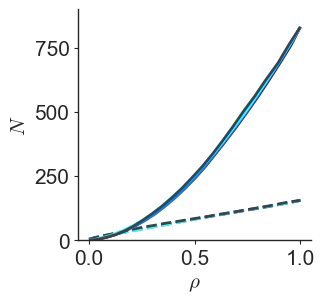

In [5]:
nbcols = 1
nbrows = 1
devstages = ['0hAPF', '2hAPF', '4hAPF']

fig,ax = plt.subplots(nbrows, nbcols,
                       figsize = (3, 3)
                      )
for i in [0,1]:
    roi = rois[i]   
    if roi == 'DV':
        linestyle = '--'
    elif roi == 'outDV':
        linestyle = '-'
    for j in range(len(devstages)):   
        devstage = devstages[j]

        query_str = '(devstage_final == "' + devstage + '") & (region == "' + roi + '")'
    
        ax.set_ylim(0,900)
        # ax.set_xlim(0,220)
        ax.set_yticks(np.arange(0,910,250))


        data = df_comparison.query(query_str)

        x_col_mean = 'pathlength_scaled'
        y_col_mean = 'cumcount_mean'

        #ax.fill_between(stat_df[y_col_mean], stat_df[x_col_mean] - yerr, stat_df[x_col_mean] + yerr, color = colors[devstage], alpha = 0.2)            

        ax.plot(data[x_col_mean], data[y_col_mean], color = colors[devstage], lw = 2, label = devstage, linestyle = linestyle)
        
    query_str = '(devstage_init == "' + 'wL3' + '") & (region == "' + roi + '")'
    data = df_comparison.query(query_str)
    #this will give us three sets of wL3 data, one for each devstage_final, hence we choose the first one
    query_str = 'devstage_final == "0hAPF"'
    data = data.query(query_str) 
    ax.plot(data['ref_pathlength_scaled'], data['cumcount_mean'], linestyle = linestyle, color = colors["wL3"], linewidth = 2, label = 'wL3')

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$N$')
plt.savefig(dataout +'/' + genotype + '_rho_vs_N-noIncreaselimits.pdf',dpi = 600,bbox_inches='tight')

# Plot lambdas as circle plots 

In [18]:

def get_isotropic_subplot(ax, DV_width = 0.2, stage_init = "wL3", stage_final = "4hAPF", N = 20, zorder = 2, add_cbar = False, fit_lambdas_df = None, add_boundary = True, boundary_lw = 1,
                          xlim = None, ylim = None, cbar_ticks = [0.5,1,1.5], fontsize = 10, cbar_name = r"$\lambda$",
                          vmin = 0.5, vmax = 1.5, cmap = matplotlib.cm.bwr, lambda_name = "lambda_isotropic_coeffs",
                         ):
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/artist_reference.html#sphx-glr-gallery-shapes-and-collections-artist-reference-py
    #to control z order 
    #https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
    #add each patch separately to ax and mention its zorder

    patches = []

    R = 1
    w = R/N

    center_bottom = (0,-DV_width/2)
    center_top = (0,DV_width/2)

    
    roi = "outDV"
    query_str = 'stage_init == "' + stage_init + '" and stage_final == "' + stage_final + '" and roi == "' + roi + '" and prop == "'+ lambda_name + '"'
    poly_obj = np.poly1d(fit_lambdas_df.query(query_str)["value"].iloc[0])
    radii = [(N-i)*w for i in range(N)]#[(i+1)*w for i in range(N)]
    patches = [Wedge((center_bottom), radius, 180, 360) for radius in radii] #add width = w in Wedge if you want an annulus
    colors = [poly_obj(radius) for radius in radii]

    patches += [Wedge((center_top), radius,0,180) for radius in radii]
    colors += [poly_obj(radius) for radius in radii]
    #zorders += [i for i in range(N)]

    #adding rectangles inisde DV boundary
    lambda_name = "inDV_" + lambda_name
    roi = "DV"
    #query_str = '(stage_init == "' + stage_init + '") & (stage_final == "' + stage_final + '") & (roi == "' + roi + '")'
    query_str = 'stage_init == "' + stage_init + '" and stage_final == "' + stage_final + '" and roi == "' + roi + '" and prop == "'+ lambda_name + '"'
    poly_obj = np.poly1d(fit_lambdas_df.query(query_str)["value"].iloc[0])
    x_vals = [-(N-i)*w for i in range(N)]
    patches += [Rectangle((x_val,-DV_width/2), 2*np.abs(x_val), DV_width) for x_val in x_vals]
    colors += [poly_obj(np.abs(x_val)) for x_val in x_vals]


    ###########
    #colors = 100*np.random.random(len(patches))
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    p = PatchCollection(patches, cmap=cmap, norm = norm, alpha=1, edgecolor = None, zorder = zorder)
    p.set_array(colors)
    ax.add_collection(p)
    ###########
    
    if add_boundary:
        p = Arc(center_bottom, 2,2, theta1=180, theta2=360, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        p = Arc(center_top, 2,2, theta1=0, theta2=180, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        p = Rectangle((-1,center_bottom[1]), 2, DV_width, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        
    #########
    if xlim is None:
        xlim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    ax.set_xlim(xlim)
    if ylim is None:
        ylim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    ax.set_ylim(ylim)
    ax.set_aspect("equal")
    ax.axis('off')
    if add_cbar: 
        cbar = plt.colorbar(p, ax = ax, ticks = cbar_ticks)
        cbar.ax.set_yticklabels(labels = [str(x_) for x_ in cbar_ticks], fontsize = fontsize)  # vertically oriented colorbar
        cbar.ax.set_ylabel(cbar_name, rotation=0, fontsize = fontsize)
        
    return(ax)


In [19]:

def get_quiver_specs(R = 1, theta = 0, roi = "outDV", center = (0,0), stage_init ="wL3", stage_final = "4hAPF", lambda_name ="lambda_isotropic_coeffs", fit_lambdas_df = None):
    
    #from roi, get the location
    if roi == "outDV":
        x,y = R*np.cos(theta)+center[0], R*np.sin(theta)+center[1]
    if roi == "DV":
        x,y = R,theta
    
    #from roi get the correct lambda fit poynomial
    query_str = 'stage_init == "' + stage_init + '" and stage_final == "' + stage_final + '" and roi == "' + roi + '" and prop == "'+lambda_name+'"'
    poly_obj = np.poly1d(fit_lambdas_df.query(query_str)["value"].iloc[0])
    #from the polynomial get the value
    lambda_val = poly_obj(np.abs(R))
    #from the value get the direction
    if roi == "outDV" and lambda_val < 1 :
        u = -np.abs(1 - lambda_val)*np.sin(theta)
        v = np.abs(1 - lambda_val)*np.cos(theta)
    if roi == "outDV" and lambda_val >= 1 :
        u = np.abs(1 - lambda_val)*np.cos(theta)
        v = np.abs(1 - lambda_val)*np.sin(theta)
    if roi == "DV" and lambda_val < 1 :
        u = 0
        v = np.abs(1 - lambda_val)
    if roi == "DV" and lambda_val >= 1 :
        u = np.abs(1 - lambda_val)
        v = 0
    
    return(x,y,u,v)


In [20]:
def get_nematic_subplot(ax, stage_init="wL3", stage_final = "4hAPF", lambda_name ="lambda_anisotropic_coeffs", DV_width = 0.2, zorder = 10, fit_lambdas_df = None, add_boundary = True,
                        quiver_scale = 5, quiver_width = 0.005, boundary_lw = 1,
                        xlim = None, ylim = None, add_cbar = False
                       ):
    #https://stackoverflow.com/questions/34375345/how-does-pythons-matplotlib-pyplot-quiver-exactly-work
    dtheta = 0.1
    Rs= np.linspace(0.1,0.9, 5)#1
    center_bottom = (0,-DV_width/2)
    center_top = (0,DV_width/2)

    x = []
    y = []
    u = []
    v = []
    
    roi = "outDV"
    #bottom
    thetas = np.linspace(np.pi+dtheta, 2*np.pi-dtheta,10)
    for R in Rs:
        for theta in thetas:
            x_,y_,u_,v_ = get_quiver_specs(R=R, theta=theta, roi=roi, center=center_bottom, stage_init=stage_init, stage_final=stage_final, lambda_name=lambda_name, fit_lambdas_df = fit_lambdas_df)
            x += [x_]
            y += [y_]
            u += [u_]
            v += [v_]

    #top
    thetas = np.linspace(0+dtheta, np.pi-dtheta, 10)
    for R in Rs:
        for theta in thetas:
            x_,y_,u_,v_ = get_quiver_specs(R=R, theta=theta, roi=roi, center=center_top, stage_init=stage_init, stage_final=stage_final, lambda_name=lambda_name, fit_lambdas_df = fit_lambdas_df)
            x += [x_]
            y += [y_]
            u += [u_]
            v += [v_]

    #DV
    roi = "DV"
    lambda_name ="inDV_"+lambda_name
    x_DVs = np.linspace(-0.9, 0.9,10) #np.concatenate([Rs,-Rs])
    for y_DV in [0]: 
        for x_DV in x_DVs: 
            #pass x and y values as R and theta
            x_,y_,u_,v_ = get_quiver_specs(R=x_DV, theta=y_DV, roi=roi, center=(0,0), stage_init=stage_init, stage_final=stage_final, lambda_name=lambda_name, fit_lambdas_df = fit_lambdas_df)
            x += [x_]
            y += [y_]
            u += [u_]
            v += [v_]

    #add quivers
    ax.quiver(x,y,u,v, scale = quiver_scale, headwidth = 0, headlength = 0, headaxislength = 0, width = quiver_width, pivot = "mid", zorder = zorder) #increase scale value to decrease length of lines

    if add_boundary:
        p = Arc(center_bottom, 2,2, theta1=180, theta2=360, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        p = Arc(center_top, 2,2, theta1=0, theta2=180, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        p = Rectangle((-1,center_bottom[1]), 2, DV_width, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)

    #ax.set_aspect("equal")
    #if xlim is None:
    #    xlim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    #ax.set_xlim(xlim)
    #if ylim is None:
    #    ylim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    #ax.set_ylim(ylim)
    #ax.set_aspect("equal")
    #ax.axis('off')
    
    if add_cbar: 
        cbar = plt.colorbar(p, ax = ax, ticks = cbar_ticks)
        cbar.ax.set_yticklabels(labels = [str(x_) for x_ in cbar_ticks], fontsize = fontsize)  # vertically oriented colorbar
        cbar.ax.set_ylabel(cbar_name, rotation=0, fontsize = fontsize)

    return(ax)


In [21]:
#loading data
fit_lambdas_df_WT = pd.read_pickle(codeRepo + "Experiments/analyzed_output/fit_lambdas_df_ecadGFPnbG4.pkl")
fit_lambdas_df_Myo = pd.read_pickle(codeRepo + "Experiments/analyzed_output/fit_lambdas_df_ecadGFPnbG4myoVI.pkl")

#setting colorbar

N = 256
vals = np.ones((N, 4))
#orange - 255, 153, 51
vals[:, 0] = np.linspace(1,255/256,N) 
vals[:, 1] = np.linspace(1,153/256,N)
vals[:, 2] = np.linspace(1,51/256,N)
#to invert the color map, do np.linspace(255/256,1,N) and same for all the rest of the lines
cmap_isotropic = ListedColormap(vals)
cmap_anisotropic = sns.diverging_palette(145,300, s=60, as_cmap=True)
#cmap_anisotropic = "PuGr"

#other plotting specifications

Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 1
text_kwargs = dict(ha='center', va='center', color='C1')

#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches 
#set figsize like this - figsize=(3*cm_, 2*cm_)

#settings for quivers
quiver_scale=3
quiver_width=0.01
DV_width = np.sin(0.1931/2)/np.sin(0.8662) #around 0.1
#circ_plot_xlim = (-1.25,1.25)
#circ_plot_ylim = (-1.1, 1.4)

In [22]:
DV_width = 0.2

#load fit file

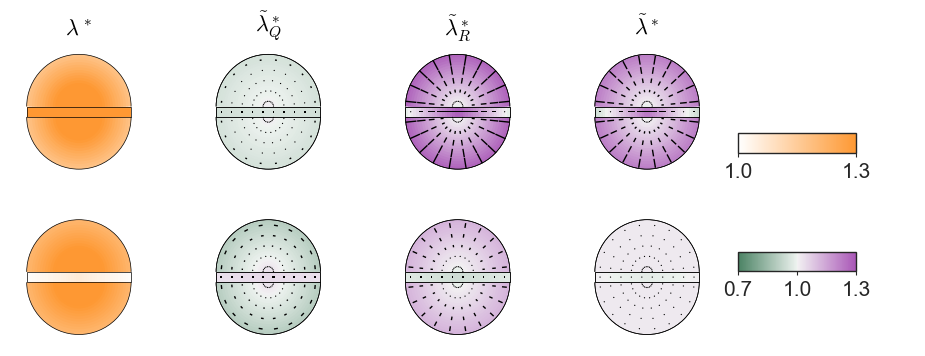

In [24]:
figsize = (6*5*cm_, 5*2*cm_)
fig,axs = plt.subplots(2,5, figsize = figsize)

[isotropic_vmin, isotropic_vmax] = [1.0, 1.3]
[anisotropic_vmin, anisotropic_vmax] = [0.7, 1.3]


#WT

#just area
ax = axs[0,0]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar = False, fontsize=Medium_font_size, cmap = cmap_isotropic, vmin = isotropic_vmin, vmax = isotropic_vmax,)
ax.set_title(r"$\lambda^*$")

#just elongation
ax = axs[0,1]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name = "lambda_Q_coeffs"
                          )

ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_Q_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
ax.set_title(r"$\tilde{\lambda}^*_Q$")

#just rearrangemnt
ax = axs[0,2]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_rearrangement_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_rearrangement_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
ax.set_title(r"$\tilde{\lambda}^*_R$")

#all anisotropic
ax = axs[0,3]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_anisotropic_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_anisotropic_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
ax.set_title(r"$\tilde{\lambda}^*$")

#Myo

#just area
ax = axs[1,0]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar = False, fontsize=Medium_font_size, cmap = cmap_isotropic, vmin = isotropic_vmin, vmax = isotropic_vmax,)


#just elongation
ax = axs[1,1]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name = "lambda_Q_coeffs"
                          )

ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_Q_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

#just rearrangemnt
ax = axs[1,2]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_rearrangement_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_rearrangement_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

#all anisotropic
ax = axs[1,3]
ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_anisotropic_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_anisotropic_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

ax = axs[0,4]
ax.axis("off")
ax = fig.add_axes([0.75, 0.60, 0.1, 0.05])
#cb = plt.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap='PuOr') #
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap=cmap_isotropic) #
cb.set_ticks([0,1])
cb.set_ticklabels([str(isotropic_vmin), str(isotropic_vmax)])
cb.outline.set_linewidth(1)

ax = axs[1,4]
ax.axis("off")
ax = fig.add_axes([0.75, 0.30, 0.1, 0.05])
#cb = plt.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap='PuOr') #
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap=cmap_anisotropic) #
cb.set_ticks([0,0.5,1])
cb.set_ticklabels([str(anisotropic_vmin), "1.0", str(anisotropic_vmax)])
cb.outline.set_linewidth(1)

plt.savefig(dataout +'/' + genotype + '_rho_vs_N-noIncreaselimits.pdf',dpi = 600,bbox_inches='tight')

WT - Area

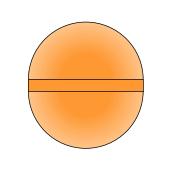

In [28]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar = False, fontsize=Medium_font_size, cmap = cmap_isotropic, vmin = isotropic_vmin, vmax = isotropic_vmax,)
plt.savefig(dataout +'/' + "WT_circ_plot_only_area.pdf", bbox_inches = "tight")

WT - Elongation

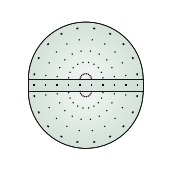

In [29]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name = "lambda_Q_coeffs"
                          )

ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_Q_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
plt.savefig(dataout +'/' + "WT_circ_plot_elongation.pdf", bbox_inches = "tight")

WT - Rearrangement

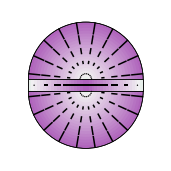

In [30]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_rearrangement_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_rearrangement_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
#ax.set_title("wL3 " + r"$\to$" + " 4hAPF", fontsize = Medium_font_size)
plt.savefig(dataout +'/' + "WT_circ_plot_rearrangement.pdf", bbox_inches = "tight")

WT - Anisotropic

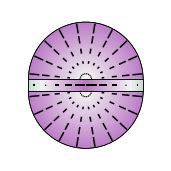

In [31]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_anisotropic_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_WT, 
                         lambda_name ="lambda_anisotropic_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)
#ax.set_title("wL3 " + r"$\to$" + " 4hAPF", fontsize = Medium_font_size)
plt.savefig(dataout +'/' + "WT_circ_plot_rearrangement_and_elongation.pdf", bbox_inches = "tight")

Myo - Area

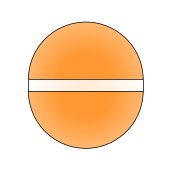

In [32]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar = False, fontsize=Medium_font_size, cmap = cmap_isotropic, vmin = isotropic_vmin, vmax = isotropic_vmax,)

plt.savefig(dataout +'/' + "Myo_circ_plot_only_area.pdf", bbox_inches = "tight")

Myo - Elongation

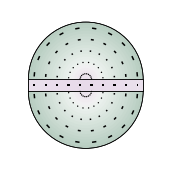

In [33]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name = "lambda_Q_coeffs"
                          )

ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_Q_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

#ax.set_title("wL3 " + r"$\to$" + " 4hAPF", fontsize = Medium_font_size)
plt.savefig(dataout +'/' + "Myo_circ_plot_elongation.pdf", bbox_inches = "tight")

Myo - Rearrangement

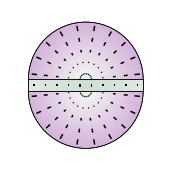

In [34]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_rearrangement_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_rearrangement_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

plt.savefig(dataout +'/' + "Myo_circ_plot_rearrangement.pdf", bbox_inches = "tight")

Myo - Anisotropic

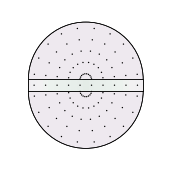

In [35]:
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, DV_width = DV_width,
                           boundary_lw=lw/2, add_cbar=False, fontsize=Medium_font_size, cmap = cmap_anisotropic, vmin = anisotropic_vmin, vmax = anisotropic_vmax,
                           lambda_name ="lambda_anisotropic_coeffs"
                          )
ax = get_nematic_subplot(ax, stage_init="wL3", stage_final="4hAPF", fit_lambdas_df=fit_lambdas_df_Myo, 
                         lambda_name ="lambda_anisotropic_coeffs", DV_width = DV_width,
                         quiver_scale=quiver_scale, quiver_width=quiver_width,
                           boundary_lw=lw/2)

plt.savefig(dataout +'/' + "Myo_circ_plot_rearrangement_and_elongation.pdf", bbox_inches = "tight")